## Context

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.

There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.


##### Model
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- FFV = Flexible-fuel vehicle
- SWB = Short wheelbase
- LWB = Long wheelbase
- EWB = Extended wheelbase

##### Transmission
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

##### Fuel type
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural gas

##### Fuel Consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

##### CO2 Emissions
The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving


In [266]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score
from math import sqrt

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [153]:
df = pd.read_csv("CO2 Emissions_Canada.csv", sep = ',')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [155]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [156]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


# DATA PREPROCESSING

### DATA EXPLORATION

In [157]:
df1 = df.copy()

In [158]:
df_dtypes = df1.dtypes.reset_index()

In [159]:
df_dtypes.columns = ['columns', 'datatype']

Outlier check for the column Engine Size(L)


<AxesSubplot:xlabel='Engine Size(L)'>

Outlier check for the column Cylinders


<AxesSubplot:xlabel='Cylinders'>

Outlier check for the column Fuel Consumption City (L/100 km)


<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)'>

Outlier check for the column Fuel Consumption Hwy (L/100 km)


<AxesSubplot:xlabel='Fuel Consumption Hwy (L/100 km)'>

Outlier check for the column Fuel Consumption Comb (L/100 km)


<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)'>

Outlier check for the column Fuel Consumption Comb (mpg)


<AxesSubplot:xlabel='Fuel Consumption Comb (mpg)'>

Outlier check for the column CO2 Emissions(g/km)


<AxesSubplot:xlabel='CO2 Emissions(g/km)'>

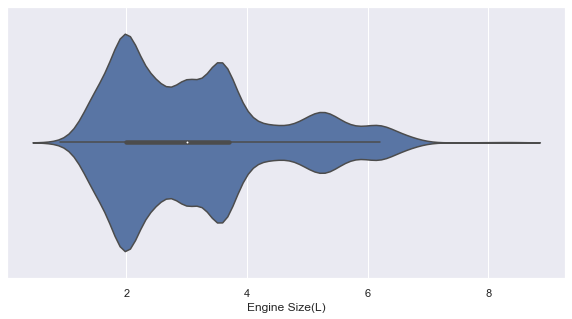

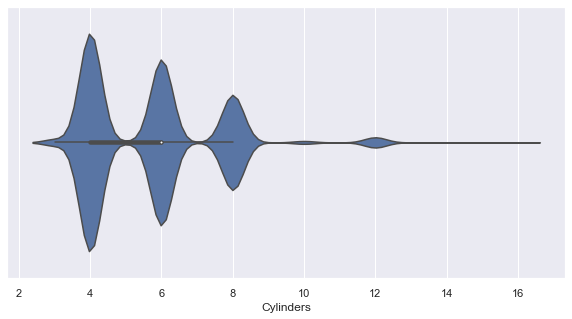

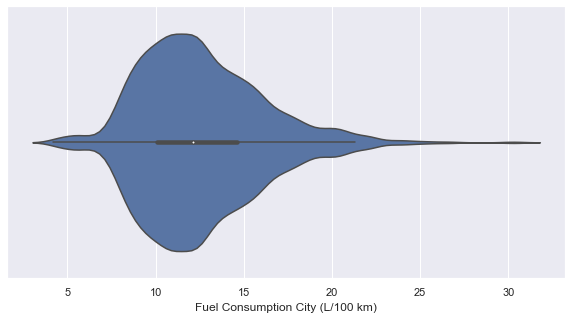

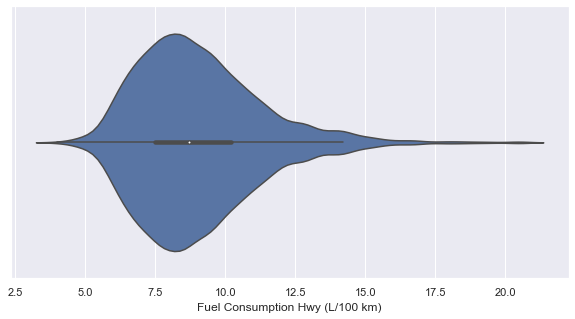

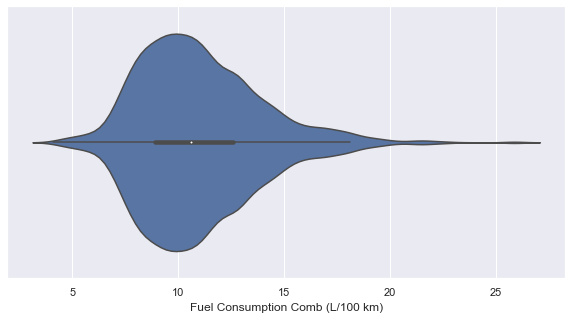

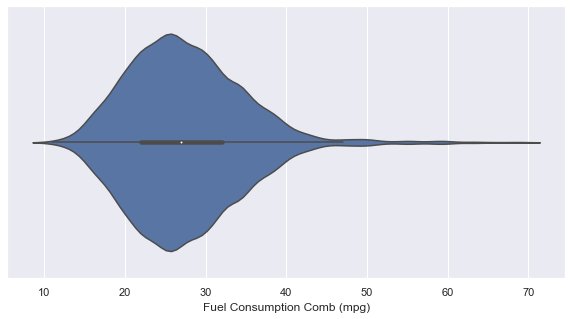

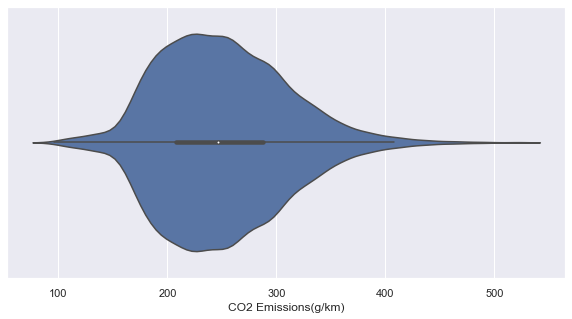

In [160]:
num_cols = df1[df_dtypes[df_dtypes['datatype'] != 'object']['columns']].columns

for i in num_cols:
    print('Outlier check for the column %s' % i)
    plt.figure(figsize = (10,5))
    plt.xlabel(i)
    plt.xticks()
    display(sns.violinplot(data = df1, x = i))

Outlier is not a problem in this dataset at all. Let us explore further

### Numerical Variables

Histogram for the column Engine Size(L)


<AxesSubplot:xlabel='Engine Size(L)', ylabel='Count'>

Histogram for the column Cylinders


<AxesSubplot:xlabel='Cylinders', ylabel='Count'>

Histogram for the column Fuel Consumption City (L/100 km)


<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Count'>

Histogram for the column Fuel Consumption Hwy (L/100 km)


<AxesSubplot:xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='Count'>

Histogram for the column Fuel Consumption Comb (L/100 km)


<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Count'>

Histogram for the column Fuel Consumption Comb (mpg)


<AxesSubplot:xlabel='Fuel Consumption Comb (mpg)', ylabel='Count'>

Histogram for the column CO2 Emissions(g/km)


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Count'>

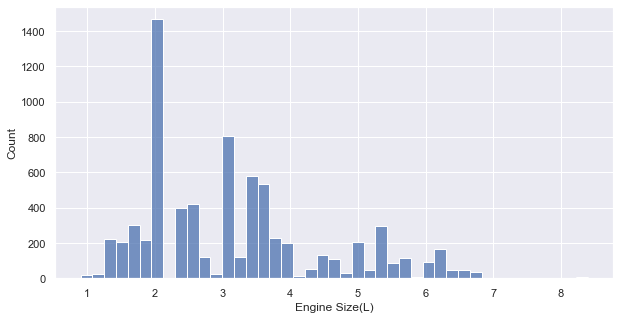

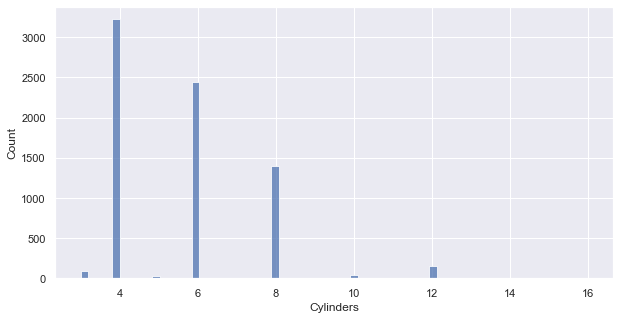

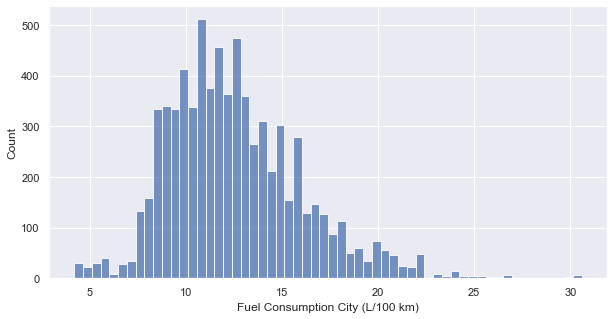

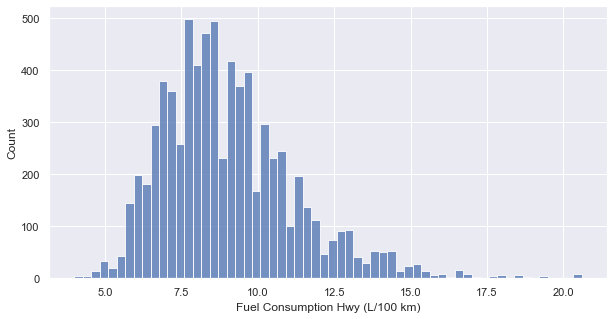

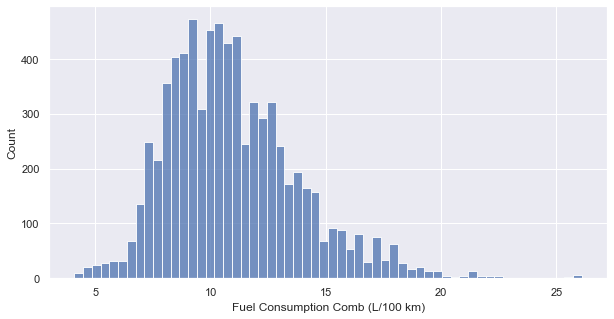

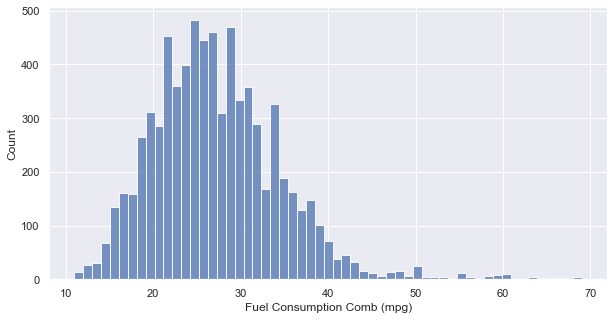

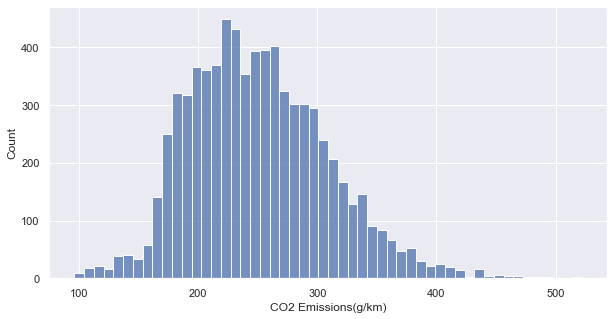

In [161]:
#Histogram for numerical columns

for i in num_cols:
    print('Histogram for the column %s' % i)
    plt.figure(figsize = (10,5))
    plt.xlabel(i)
    plt.xticks()
    display(sns.histplot(data = df1, x = i))

In [162]:
num_cols

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

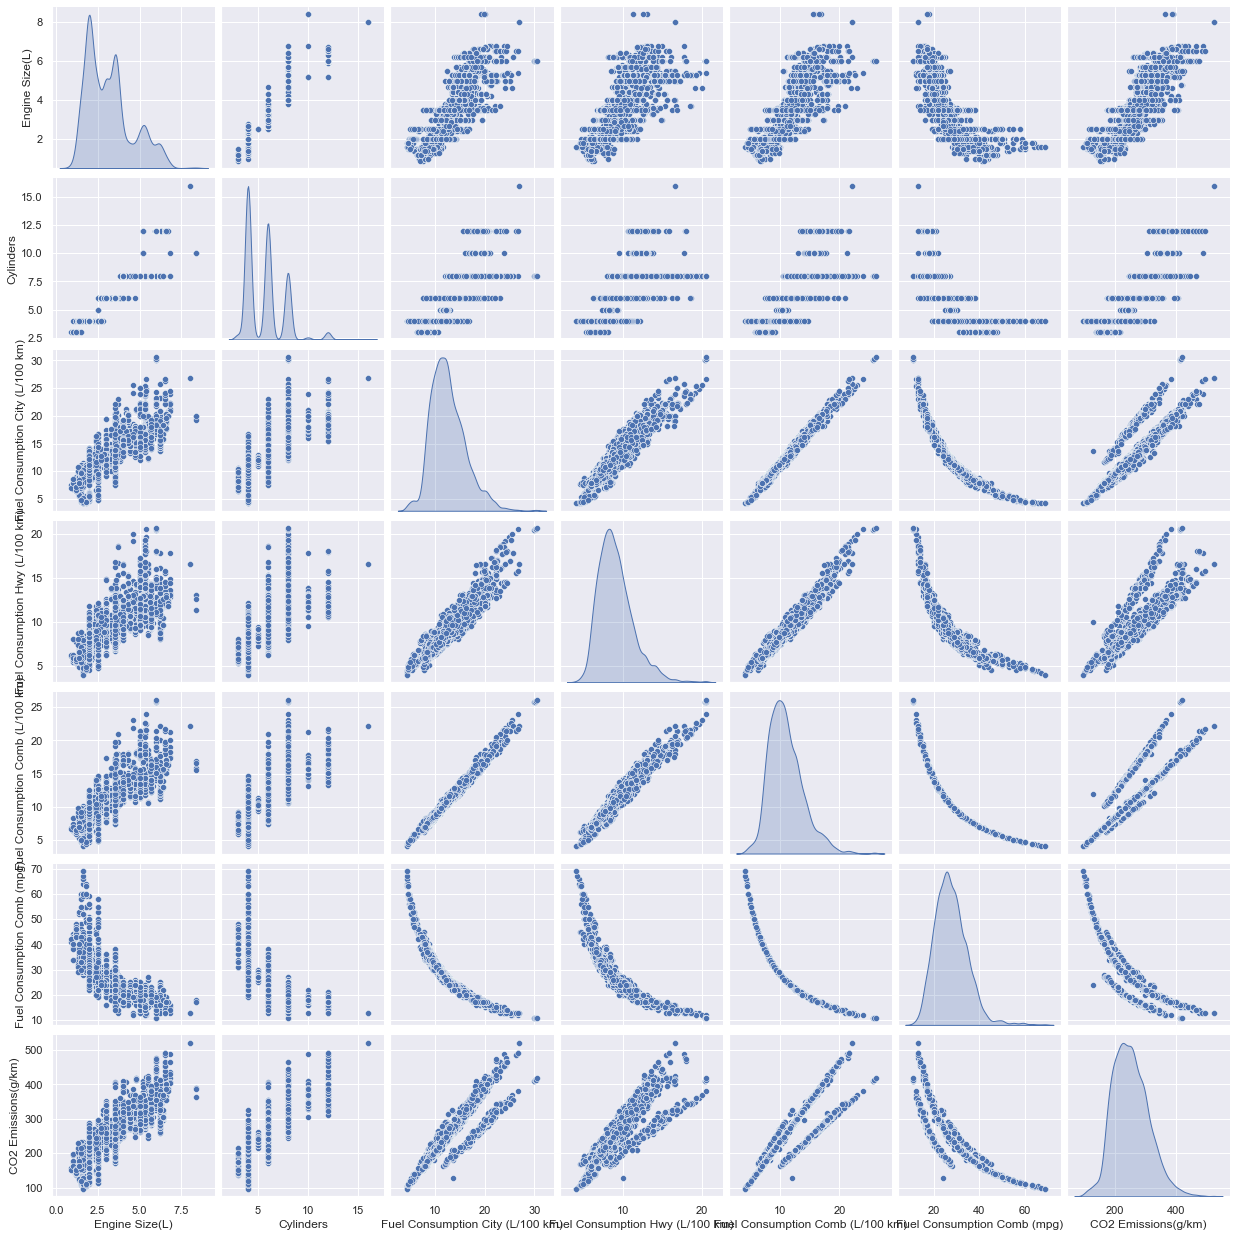

In [163]:
sns.pairplot(data = df1, vars = num_cols, diag_kind = 'kde')

Most of the variables are correlated with each other from the above pariplots. It is imperative to do correlation analysis

Most of the columns are highly correlated with each other. Let us try to reduce the components into the principal components.

### Categorical Variables

In [164]:
cat_cols = df1[df_dtypes[df_dtypes['datatype'] == 'object']['columns']].columns

In [165]:
cat_cols

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

Histogram for the column Make


<AxesSubplot:xlabel='Make', ylabel='Count'>

Histogram for the column Model


<AxesSubplot:xlabel='Model', ylabel='Count'>

Histogram for the column Vehicle Class


<AxesSubplot:xlabel='Vehicle Class', ylabel='Count'>

Histogram for the column Transmission


<AxesSubplot:xlabel='Transmission', ylabel='Count'>

Histogram for the column Fuel Type


<AxesSubplot:xlabel='Fuel Type', ylabel='Count'>

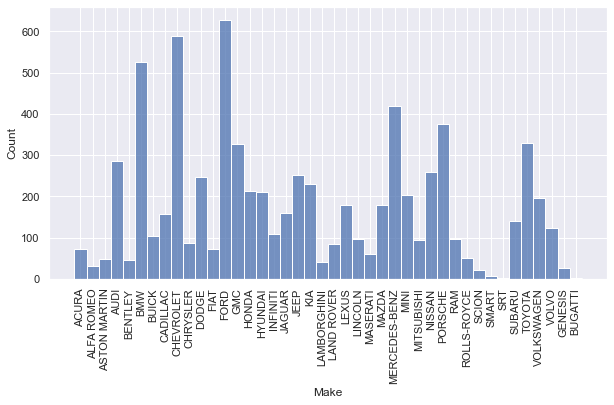

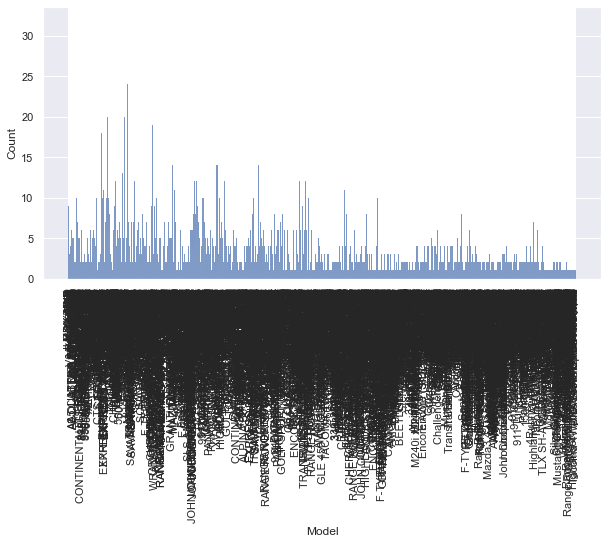

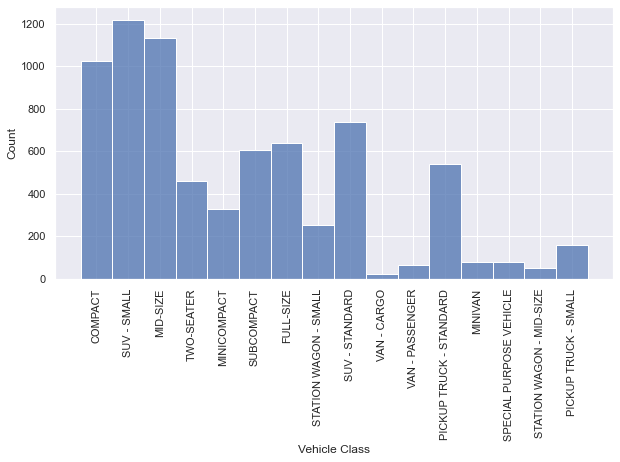

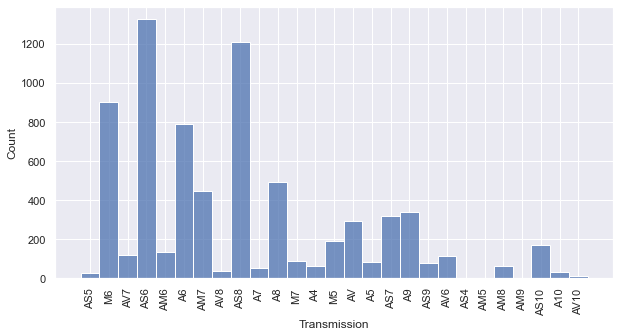

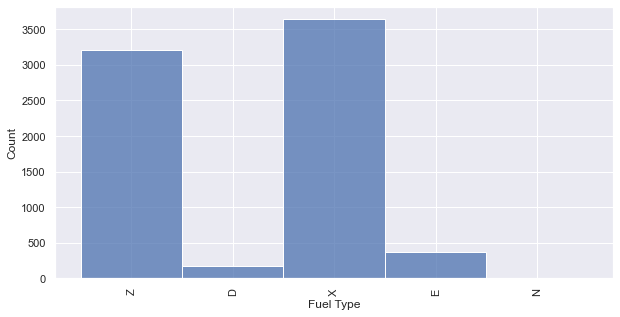

In [166]:
#Histograms

for i in cat_cols:
    print('Histogram for the column %s' % i)
    plt.figure(figsize = (10,5))
    plt.xlabel(i)
    plt.xticks(rotation = 90)
    display(sns.histplot(data = df1, x = i))

Comparison of Make with CO2 emissions
Comparison of Model with CO2 emissions
Comparison of Vehicle Class with CO2 emissions
Comparison of Transmission with CO2 emissions
Comparison of Fuel Type with CO2 emissions


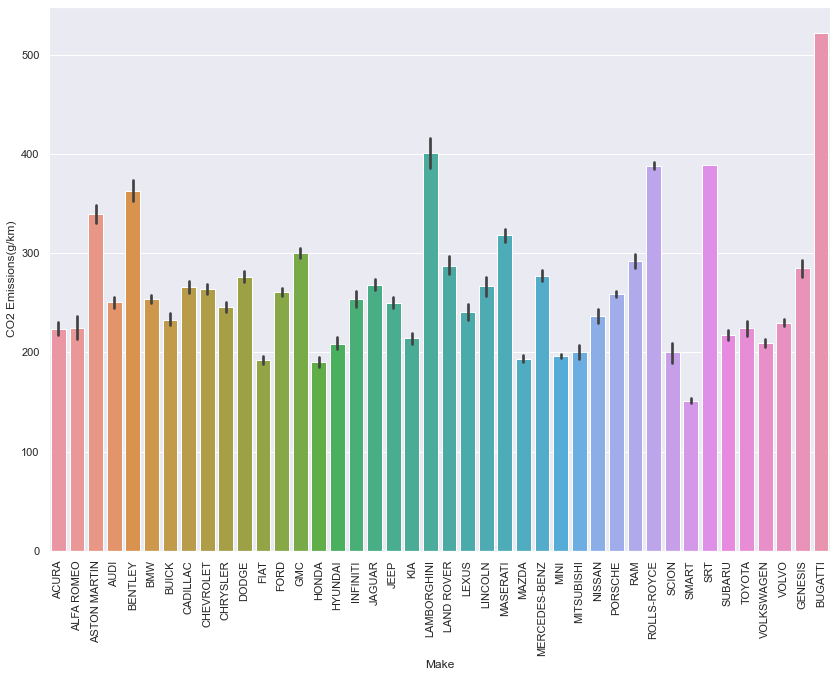

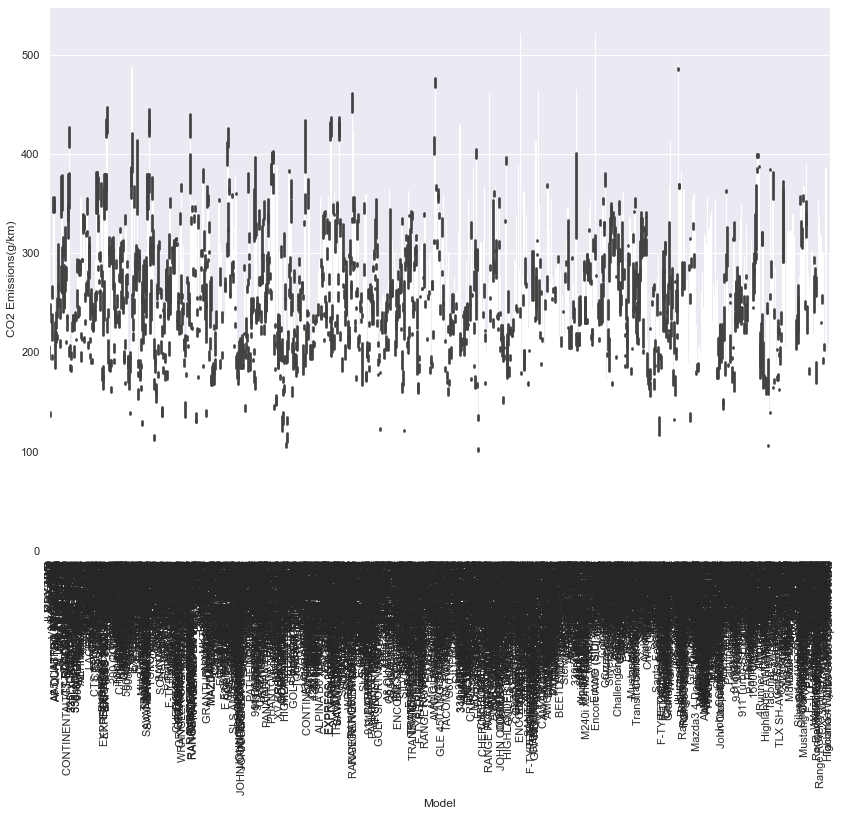

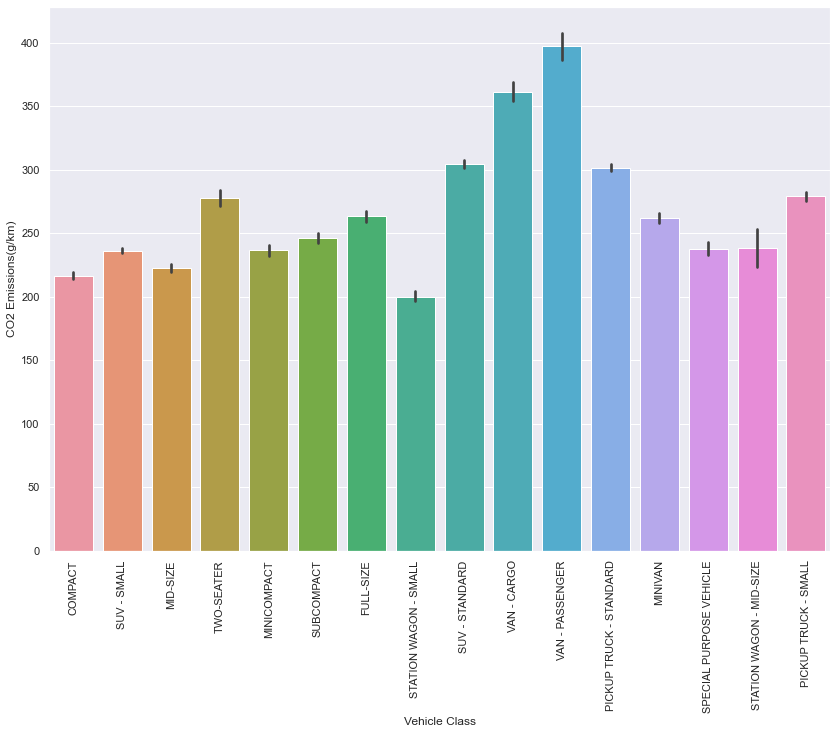

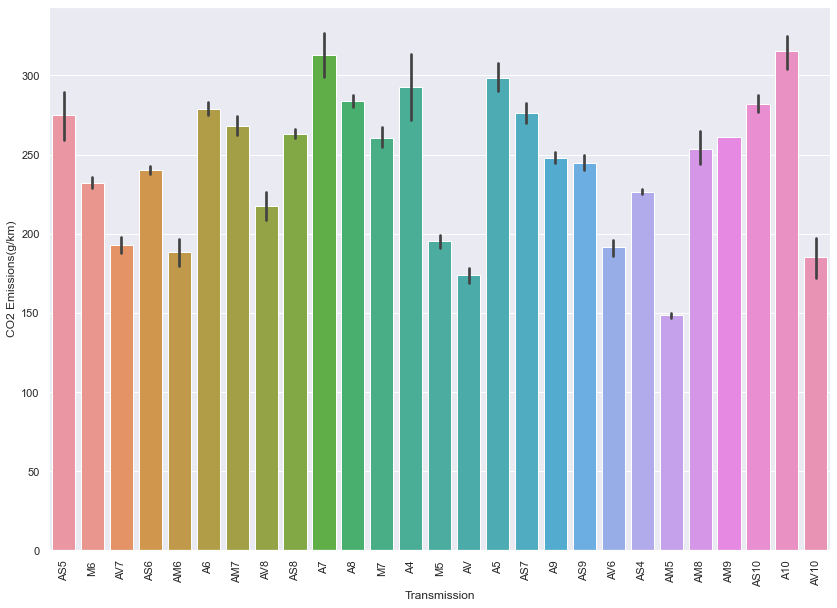

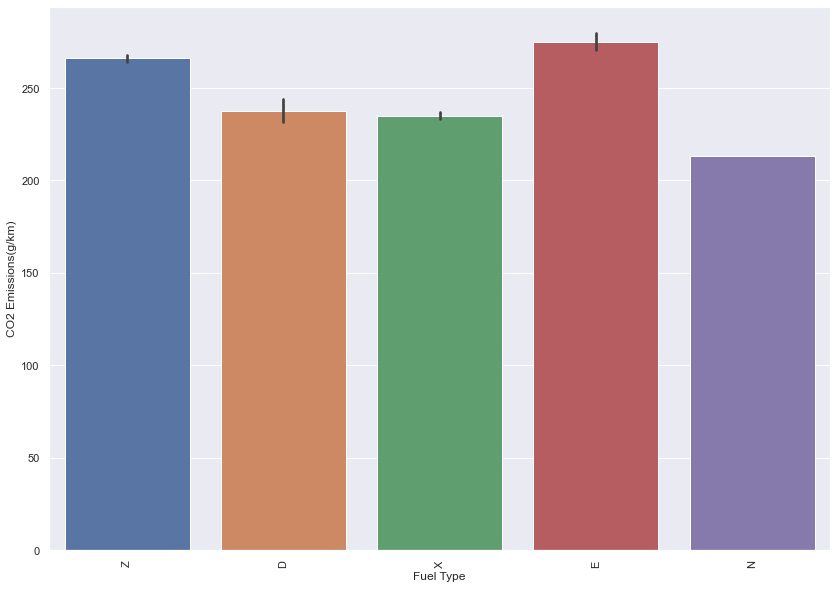

In [167]:
for i in cat_cols:
    print("Comparison of %s with CO2 emissions" % i)
    plt.figure(figsize = (14,10))
    plt.xticks(rotation = 90)
    sns.barplot(data = df1, x= i, y = 'CO2 Emissions(g/km)')

Some of the useful insights are - the fuel type for D and E are less in number in the data. Yet, they seem to have high CO2 emissions 

<AxesSubplot:>

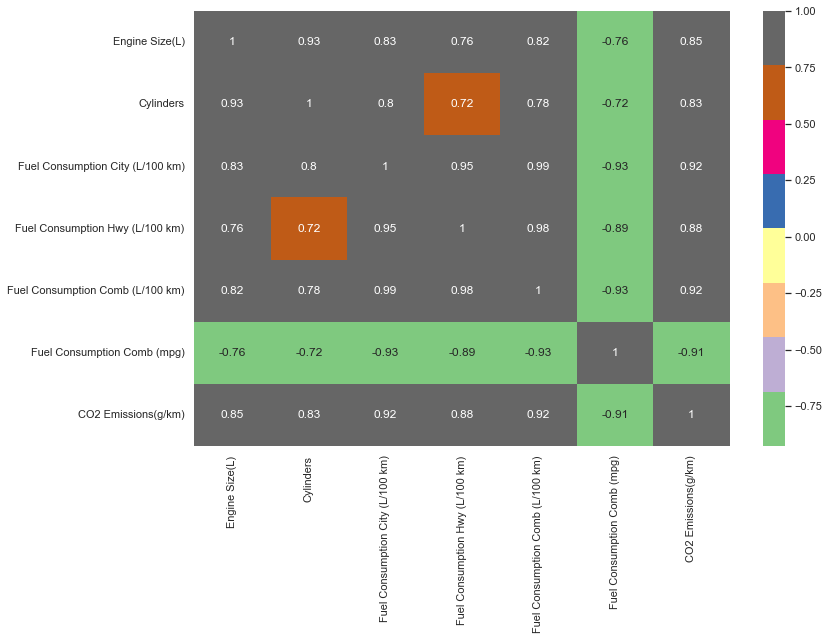

In [168]:
#Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot = True, cmap='Accent')

In [169]:
df1.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [170]:
df1.Model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [171]:
#Treating the variabels in the linear fashion and replacing the categories
make_num = pd.Series(range(1,len(df1.Make.unique())+1))

make_df = pd.DataFrame(make, make_num).reset_index()
make_df.rename(columns = {'index':'make_num',
                         0:'make'}, inplace = True)

### REPLACING THE CATEGORIES

In [172]:
#Make num for series

make = pd.Series(df1.Make.unique())
make_dict = make.to_dict()

In [173]:
make_dict = dict((v,k) for k,v in make_dict.items())

In [174]:
df1['Make'] = df1['Make'].map(make_dict)

In [175]:
#Model replacement

model = pd.Series(df1.Model.unique())
model_dict = model.to_dict()

In [176]:
model_dict = dict((v,k) for k,v in model_dict.items())

In [177]:
df1['Model'] = df1['Model'].map(model_dict)

In [178]:
#Model replacement

vclass = pd.Series(df1['Vehicle Class'].unique())
vclass_dict = vclass.to_dict()

In [179]:
vclass_dict = dict((v,k) for k,v in vclass_dict.items())

In [180]:
df1['Vehicle Class'] = df1['Vehicle Class'].map(vclass_dict)

In [181]:
#Transmission replacement

trans = pd.Series(df1['Transmission'].unique())
trans_dict = trans.to_dict()

In [182]:
trans_dict = dict((v,k) for k,v in trans_dict.items())

In [183]:
df1['Transmission'] = df1['Transmission'].map(trans_dict)

In [184]:
#Fuel Type replacement

fuel = pd.Series(df1['Fuel Type'].unique())
fuel_dict = fuel.to_dict()

In [185]:
fuel_dict = dict((v,k) for k,v in fuel_dict.items())

In [186]:
df1['Fuel Type'] = df1['Fuel Type'].map(fuel_dict)

In [187]:
df1.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,0,0,2.0,4,0,0,9.9,6.7,8.5,33,196
1,0,0,0,2.4,4,1,0,11.2,7.7,9.6,29,221
2,0,1,0,1.5,4,2,0,6.0,5.8,5.9,48,136
3,0,2,1,3.5,6,3,0,12.7,9.1,11.1,25,255
4,0,3,1,3.5,6,3,0,12.1,8.7,10.6,27,244


# MODELLING

In [190]:
scaler = StandardScaler()

In [192]:
X = df1.drop('CO2 Emissions(g/km)', axis = 1)

In [193]:
X_scaled = scaler.fit_transform(X)

In [194]:
y = df1['CO2 Emissions(g/km)']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

### PRINCIPAL COMPONENT ANALYSIS

In [218]:
# Let us try running the PCA to optimise the features
pca = PCA()

In [220]:
principalComponents = pca.fit_transform(X_train)

In [221]:
pca_df = pd.DataFrame(data = principalComponents)

In [222]:
pca.explained_variance_

array([5.50512029e+00, 1.31973896e+00, 1.22936534e+00, 9.32366058e-01,
       7.41059432e-01, 6.16340687e-01, 4.35234134e-01, 1.05800040e-01,
       6.55176022e-02, 3.35307814e-02, 1.41854931e-04])

In [223]:
pca.explained_variance_ratio_

array([5.01184673e-01, 1.20148680e-01, 1.11921090e-01, 8.48823555e-02,
       6.74658517e-02, 5.61114907e-02, 3.96235987e-02, 9.63200727e-03,
       5.96470492e-03, 3.05263334e-03, 1.29144348e-05])

In [224]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.080939,0.403235,-1.596499,1.074136,-0.912170,0.171547,-0.090607,-0.245776,-0.177747,-0.050777,0.014689
1,3.929814,1.484239,-0.914105,-1.135250,0.871079,-0.701788,0.417645,0.421660,0.427185,0.308774,0.002387
2,-2.671781,0.065835,0.810011,-1.290402,-1.099865,-0.253390,0.368988,-0.109360,0.055699,-0.185843,0.016827
3,-1.554498,1.269628,0.693757,1.139231,0.561374,-1.453986,-0.955525,-0.016884,0.374740,0.100695,0.012133
4,3.127225,-0.127620,-0.852379,-1.353715,-0.587411,0.346861,-0.177842,0.223388,0.075063,-0.274678,-0.007808


In [225]:
#Selecting the principal component by Cross-Validation

lin_reg = LinearRegression()
rmse_list = []

In [226]:
principalComponents.shape[1]

11

In [228]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [229]:
for i in range(1, principalComponents.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                       principalComponents[:,:i],
                                       y_train,
                                       cv = cv,
                                       scoring = 'neg_mean_squared_error').mean()
    rmse_list.append(rmse_score)

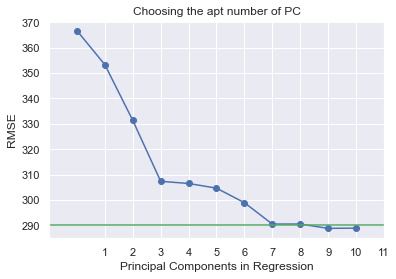

In [234]:
plt.plot(rmse_list, '-o')
plt.xlabel("Principal Components in Regression")
plt.ylabel("RMSE")
plt.xticks(np.arange(1,12,1))
plt.xlim(xmin=-1);
plt.title("Choosing the apt number of PC")
plt.axhline(y=290, color='g', linestyle='-');

9 principal components seems to be a proper selection in our case.

In [235]:
best_pc = 9
lin_reg_pc = LinearRegression().fit(X_train[:,:best_pc], y_train)

In [236]:
X_test_pc = pca.transform(X_test)[:,:best_pc]

In [237]:
pred_linear = lin_reg_pc.predict(X_test_pc)

In [243]:
mean_squared_error(y_test, pred_linear, squared=False)

60.320427092754606

In [241]:
mean_absolute_percentage_error(pred_linear, y_test)

0.19013635062372833

In [242]:
mean_absolute_error(pred_linear, y_test)

47.796987435172014

### K-NEIGHBIOURS REGRESSOR

In [252]:
model_knn = KNeighborsRegressor()

In [279]:
# Create 3 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [254]:
# Define our candidate hyperparameters
param = [{'n_neighbors': [2,3,4,5,8,10,12,14,15], 'weights': ['uniform','distance']}]

In [255]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=model_knn, param_grid=param, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 8, 10, 12, 14, 15],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [256]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.9847004868010659
KNeighborsRegressor(weights='distance')
{'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
#for k in range(20):
#    k = k+1
#    model.fit(X_train, y_train)
#    
#    pred_knn = model.predict(X_test)
#    knn_error = sqrt(mean_squared_error(y_test, pred_knn))
#    rmse_knn.append(knn_error)
#    print('RMSE value for k = ', k, ' is ', rmse_knn)

In [ ]:
#plotting the rmse values against k values
#curve = pd.DataFrame(rmse_knn) #elbow curve 
#curve.plot()

In [257]:
model_knn2 = KNeighborsRegressor(n_neighbors= 5, weights = 'distance')

In [258]:
model_knn2.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [259]:
pred = model_knn2.predict(X_test)
print(pred)

[253.         341.82936089 327.         ... 318.27474999 280.
 185.        ]


In [260]:
score = model_knn2.score(X_test, y_test)
print(score)

0.9878301755127193


Text(0, 0.5, 'Prediction')

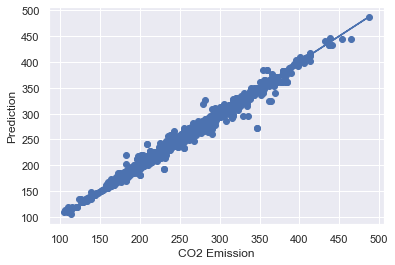

In [261]:
#Plotting the predicted value for reference 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, pred)
ax.plot(y_test, y_test)
ax.set_xlabel("CO2 Emission")
ax.set_ylabel("Prediction")

In [262]:
mean_absolute_error(grid.predict(X_test), y_test)

3.474940903766056

In [263]:
mean_absolute_percentage_error(grid.predict(X_test), y_test)

0.014038390340512252

In [264]:
mean_squared_error(grid.predict(X_test),y_test)

41.5136245224607

### DECISION TREE REGRESSOR

In [267]:
ext_reg= ExtraTreesRegressor()

In [268]:
ext_reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [269]:
ext_reg.feature_importances_

array([0.00092528, 0.00085445, 0.00356838, 0.09447362, 0.14192887,
       0.00070552, 0.04446796, 0.16510951, 0.16315833, 0.18397801,
       0.20083007])

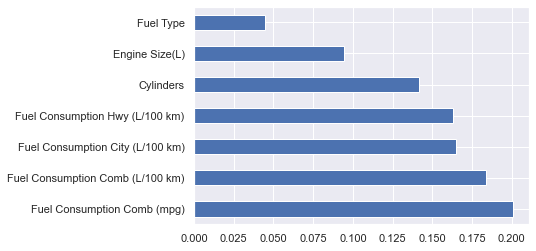

In [271]:
feat_importances = pd.Series(ext_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [272]:
reg_decision_model=DecisionTreeRegressor()

In [273]:
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [274]:
reg_decision_model.score(X_train,y_train)

0.9997589200887814

In [275]:
reg_decision_model.score(X_test,y_test)

0.9958037036465169

In [276]:
prediction=reg_decision_model.predict(X_test)

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Density'>

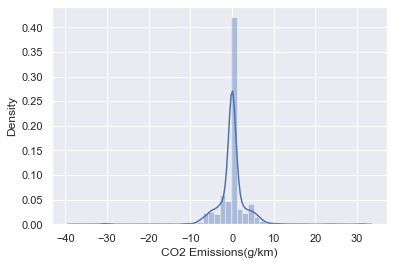

In [277]:
sns.distplot(y_test-prediction)

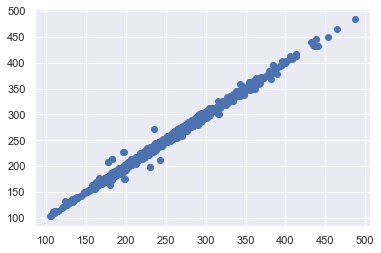

In [278]:
plt.scatter(y_test,prediction)

In [281]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [282]:
tuning_model = GridSearchCV(reg_decision_model,
                            param_grid=parameters,
                            scoring='neg_mean_squared_error',
                            cv=kfold,
                            verbose=3)

In [ ]:
tuning_model.fit(X_train,y_train)

In [284]:
tuning_model.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 90,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [285]:
tuning_model.best_score_

-505.14973912181705

In [286]:
reg_tree2 = DecisionTreeRegressor(max_depth = 9,
 max_features = 'log2',
 max_leaf_nodes = 90,
 min_samples_leaf = 1,
 min_weight_fraction_leaf = 0.1,
 splitter =  'best')

In [287]:
reg_tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, max_features='log2', max_leaf_nodes=90,
                      min_weight_fraction_leaf=0.1)

In [290]:
reg_tree2.score(X_train,y_train)

0.8552926786484187

In [289]:
reg_tree2.score(X_test,y_test)

0.8580929816979713

In [292]:
pred_tree = reg_tree2.predict(X_test)
print(pred_tree)

[236.99105812 356.11304348 302.11093502 ... 302.11093502 287.1877551
 176.69329389]


Text(0, 0.5, 'Prediction')

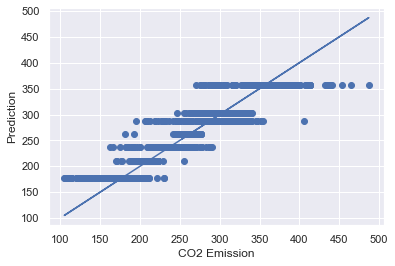

In [293]:
#Plotting the predicted value for reference 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, pred_tree)
ax.plot(y_test, y_test)
ax.set_xlabel("CO2 Emission")
ax.set_ylabel("Prediction")